In [1]:
import keras
print(keras.__version__)

2.9.0


In [2]:
from keras.datasets import imdb #영화리뷰 데이터 셋
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) #학습, 테스트 데이터 가져오기 (만개)

In [3]:
train_data.shape

(25000,)

In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[0]

1

In [6]:
word_index = imdb.get_word_index() #원래 단어
word_index.items()
reversed_word_index = dict([value, key] for (key, value) in word_index.items()) #벨류, 키 값 닥쇼너리 저장

In [7]:
decoded_review = ''.join([reversed_word_index.get(i-3,'?') for i in train_data[0]]) #0번 데이터 결과 확인(이상한 단어 ? 표시)
print(decoded_review)

?thisfilmwasjustbrilliantcastinglocationscenerystorydirectioneveryone'sreallysuitedtheparttheyplayedandyoucouldjustimaginebeingthererobert?isanamazingactorandnowthesamebeingdirector?fathercamefromthesamescottishislandasmyselfsoilovedthefacttherewasarealconnectionwiththisfilmthewittyremarksthroughoutthefilmweregreatitwasjustbrilliantsomuchthatiboughtthefilmassoonasitwasreleasedfor?andwouldrecommendittoeveryonetowatchandtheflyfishingwasamazingreallycriedattheenditwassosadandyouknowwhattheysayifyoucryatafilmitmusthavebeengoodandthisdefinitelywasalso?tothetwolittleboy'sthatplayedthe?ofnormanandpaultheywerejustbrilliantchildrenareoftenleftoutofthe?listithinkbecausethestarsthatplaythemallgrownuparesuchabigprofileforthewholefilmbutthesechildrenareamazingandshouldbepraisedforwhattheyhavedonedon'tyouthinkthewholestorywassolovelybecauseitwastrueandwassomeone'slifeafterallthatwassharedwithusall


In [8]:
type(reversed_word_index)

dict

In [9]:
for i, c in enumerate(['a', 'b', 'c'], start=1): # enumerate 각 객체 앞에 인덱스 번호가 붙는다
    print(i, c)

1 a
2 b
3 c


In [10]:
temp = enumerate(['a', 'b', 'c'])
list(temp) #enumerate -> list type으로 변경가능

[(0, 'a'), (1, 'b'), (2, 'c')]

In [11]:
#데이터 준비
import numpy as np

def vectoriz_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) #2.5만 행, 1만 열 넘파이 배열 생성

    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1

    return results

#data의 Encoding
x_train = vectoriz_sequences(train_data)
x_test = vectoriz_sequences(test_data)


In [12]:
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [13]:
#float type으로 변환
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [32]:
# 신경망 구축
from keras import models
from keras import layers

model = models.Sequential() #input 레이어
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) # 첫 신경망
model.add(layers.Dense(16, activation='relu')) # 두번째 신경망
model.add(layers.Dense(1, activation='sigmoid')) # output 레이어


In [33]:
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001), #과한 제한 두기
              loss='binary_crossentropy', #이진 손실 함수
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [16]:
x_val = x_train[:10000] #2.5만개 중 슬라이스로 1만개만 사용
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [17]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 44ms/step - loss: 0.5156 - accuracy: 0.7934 - val_loss: 0.3988 - val_accuracy: 0.8550
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3087 - accuracy: 0.9038 - val_loss: 0.3071 - val_accuracy: 0.8855
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2304 - accuracy: 0.9254 - val_loss: 0.2869 - val_accuracy: 0.8854
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1823 - accuracy: 0.9417 - val_loss: 0.2783 - val_accuracy: 0.8903
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1470 - accuracy: 0.9536 - val_loss: 0.2786 - val_accuracy: 0.8897
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1192 - accuracy: 0.9644 - val_loss: 0.3401 - val_accuracy: 0.8718
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 0.0975 - accuracy: 0.9726 - val_loss: 0.3440 - val_accuracy: 0.8760
Epoch 8/20
30

In [19]:
#실험 결과 데이터를 가져온다
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1) #횟수

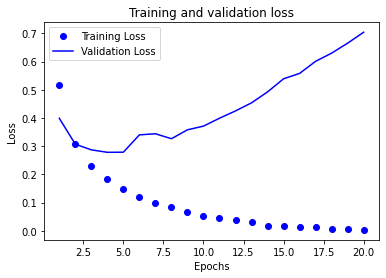

In [22]:
# 실험 결과를 시각화 한다
import matplotlib.pyplot as plt
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b-', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

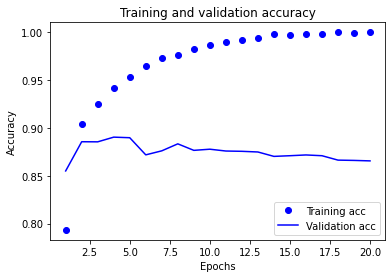

In [24]:
#결과 시각화
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b-', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [31]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=3,
                    batch_size=256,
                    validation_data=(x_val, y_val))

Epoch 1/3
59/59 [==============================] - 2s 25ms/step - loss: 0.4633 - accuracy: 0.8155 - val_loss: 0.3306 - val_accuracy: 0.8810
Epoch 2/3
59/59 [==============================] - 1s 19ms/step - loss: 0.2511 - accuracy: 0.9122 - val_loss: 0.2869 - val_accuracy: 0.8846
Epoch 3/3
59/59 [==============================] - 1s 20ms/step - loss: 0.1814 - accuracy: 0.9376 - val_loss: 0.2784 - val_accuracy: 0.8879
